0.46147011785197223
0.16202681634242488
0.6234969341943971


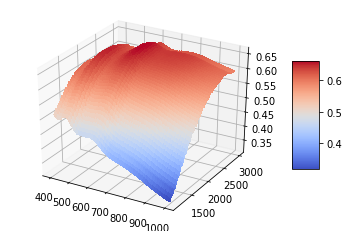

In [3]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from wptherml.wpml import multilayer
from wptherml.datalib import datalib


ccr = {
        'Temperature': 1500,
        'Material_List' : ['Air', 'W', 'Air'], 
        'Thickness_List': [0, 900e-9, 0],
        'Lambda_List': [300e-9, 4000e-9, 300],
        'Gradient_List': [1]
     
}

### create multilayer defined above
emitter = multilayer(ccr)
### compute thermal emission spectrum of the structure
emitter.thermal_emission()

### get the solar spectrum
AM = datalib.AM(emitter.lambda_array)

### create an array of different band-gap wavelengths to test 
### for the multi-junction PV / multi-junction STPV concept

### lbg for top-most PV
lbg1_list = np.linspace(400e-9, 1000e-9,150)
### lbg for bottom-most PV
lbg2_list = np.linspace(1100e-9,3000e-9,150)
### list of efficiencies
eff_list_emitter = np.zeros((150,150))
eff_list_solar   = np.zeros((150,150))
idx=-1

### loop over the lbgs and compute efficiency
for d1 in d1_list:
    jidx=-1
    idx = idx + 1
    for d2 in d2_list:
        jidx = jidx + 1
        ### compute efficiency for the thermal emitter 
        ### given lbg1 = d1 and lbg2 = d2
        emitter.multistpv_se(emitter.thermal_emission_array, d1, d2)
        eff_list_emitter[idx, jidx] = emitter.spectral_efficiency_val
        ### compute efficiency for the sun given 
        ### lbg1 = d1 and lgb2 = d2
        emitter.multistpv_se(AM, d1, d2)
        eff_list_solar = emitter.spectral_efficiency_val

        

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(d1_list*1e9, d2_list*1e9)
surf = ax.plot_surface(X, Y, eff_list, cmap=cm.coolwarm, 
                      linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=4)
plt.show()